In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['shanghaitech-people-mask', 'shanghaitech-with-people-density-map']


In [2]:
SHANGHAITECH_DATASET_PATH = "../input/shanghaitech-with-people-density-map/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/images"
print(os.listdir(SHANGHAITECH_DATASET_PATH))

['IMG_14.jpg', 'IMG_77.jpg', 'IMG_1.jpg', 'IMG_89.jpg', 'IMG_19.jpg', 'IMG_53.jpg', 'IMG_29.jpg', 'IMG_172.jpg', 'IMG_115.jpg', 'IMG_117.jpg', 'IMG_42.jpg', 'IMG_69.jpg', 'IMG_97.jpg', 'IMG_74.jpg', 'IMG_149.jpg', 'IMG_68.jpg', 'IMG_144.jpg', 'IMG_22.jpg', 'IMG_164.jpg', 'IMG_26.jpg', 'IMG_133.jpg', 'IMG_17.jpg', 'IMG_32.jpg', 'IMG_6.jpg', 'IMG_124.jpg', 'IMG_2.jpg', 'IMG_135.jpg', 'IMG_9.jpg', 'IMG_116.jpg', 'IMG_174.jpg', 'IMG_20.jpg', 'IMG_127.jpg', 'IMG_166.jpg', 'IMG_157.jpg', 'IMG_91.jpg', 'IMG_107.jpg', 'IMG_132.jpg', 'IMG_67.jpg', 'IMG_24.jpg', 'IMG_75.jpg', 'IMG_158.jpg', 'IMG_141.jpg', 'IMG_180.jpg', 'IMG_41.jpg', 'IMG_175.jpg', 'IMG_64.jpg', 'IMG_8.jpg', 'IMG_61.jpg', 'IMG_163.jpg', 'IMG_142.jpg', 'IMG_18.jpg', 'IMG_55.jpg', 'IMG_145.jpg', 'IMG_92.jpg', 'IMG_179.jpg', 'IMG_37.jpg', 'IMG_160.jpg', 'IMG_150.jpg', 'IMG_134.jpg', 'IMG_169.jpg', 'IMG_106.jpg', 'IMG_177.jpg', 'IMG_168.jpg', 'IMG_85.jpg', 'IMG_45.jpg', 'IMG_94.jpg', 'IMG_102.jpg', 'IMG_108.jpg', 'IMG_56.jpg', 'IMG_

In [3]:
MASK_DATASET_PATH = "../input/shanghaitech-people-mask/shanghaitech_mask/part_A/test_data/ground-truth-h5-mask"
print(os.listdir(MASK_DATASET_PATH))

['IMG_63.h5', 'IMG_65.h5', 'IMG_67.h5', 'IMG_130.h5', 'IMG_104.h5', 'IMG_84.h5', 'IMG_24.h5', 'IMG_116.h5', 'IMG_36.h5', 'IMG_14.h5', 'IMG_28.h5', 'IMG_43.h5', 'IMG_106.h5', 'IMG_136.h5', 'IMG_176.h5', 'IMG_51.h5', 'IMG_39.h5', 'IMG_140.h5', 'IMG_89.h5', 'IMG_101.h5', 'IMG_52.h5', 'IMG_57.h5', 'IMG_152.h5', 'IMG_41.h5', 'IMG_40.h5', 'IMG_22.h5', 'IMG_58.h5', 'IMG_168.h5', 'IMG_44.h5', 'IMG_135.h5', 'IMG_138.h5', 'IMG_68.h5', 'IMG_161.h5', 'IMG_98.h5', 'IMG_85.h5', 'IMG_54.h5', 'IMG_48.h5', 'IMG_86.h5', 'IMG_128.h5', 'IMG_155.h5', 'IMG_23.h5', 'IMG_27.h5', 'IMG_81.h5', 'IMG_64.h5', 'IMG_148.h5', 'IMG_82.h5', 'IMG_107.h5', 'IMG_145.h5', 'IMG_170.h5', 'IMG_96.h5', 'IMG_31.h5', 'IMG_9.h5', 'IMG_72.h5', 'IMG_80.h5', 'IMG_172.h5', 'IMG_5.h5', 'IMG_15.h5', 'IMG_123.h5', 'IMG_177.h5', 'IMG_11.h5', 'IMG_108.h5', 'IMG_175.h5', 'IMG_139.h5', 'IMG_74.h5', 'IMG_71.h5', 'IMG_125.h5', 'IMG_174.h5', 'IMG_75.h5', 'IMG_157.h5', 'IMG_156.h5', 'IMG_181.h5', 'IMG_94.h5', 'IMG_112.h5', 'IMG_103.h5', 'IMG_3.

In [4]:
import glob
image_path_list = glob.glob(os.path.join(SHANGHAITECH_DATASET_PATH, "IMG_176.jpg"))
print(image_path_list[0])
mask_path_list = glob.glob(os.path.join(MASK_DATASET_PATH, "IMG_176.h5"))
print(mask_path_list[0])
# import glob
# image_path_list = glob.glob(os.path.join(SHANGHAITECH_DATASET_PATH, "IMG_14.jpg"))
# print(image_path_list[0])
# mask_path_list = glob.glob(os.path.join(MASK_DATASET_PATH, "IMG_14.h5"))
# print(mask_path_list[0])

../input/shanghaitech-with-people-density-map/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/images/IMG_176.jpg
../input/shanghaitech-people-mask/shanghaitech_mask/part_A/test_data/ground-truth-h5-mask/IMG_176.h5


In [5]:
import random
import os
from PIL import Image,ImageFilter,ImageDraw
import numpy as np
import h5py
from PIL import ImageStat
import cv2

def load_image(img_path):
    """
    load density from h5
    """
    img = Image.open(img_path).convert('RGB')

    return np.asarray(img)

In [6]:
import random
import os
from PIL import Image,ImageFilter,ImageDraw
import numpy as np
import h5py
from PIL import ImageStat
import cv2

def load_mask(mask_path):
    """
    load density from h5
    """
    mask_file = h5py.File(mask_path, 'r')
    mask = np.asarray(mask_file['mask'])
    return mask

In [7]:
import glob
import PIL.Image as Image
from matplotlib import pyplot as plt
from matplotlib import cm as CM
import os
import numpy as np


def show_mask(mask_map, name):
    plt.figure(dpi=600)
    plt.axis('off')
    plt.margins(0, 0)
    
    plt.imshow(mask_map, cmap=CM.jet)
    plt.savefig(name, dpi=600, bbox_inches='tight', pad_inches=0)
    
def show_img(img, name):
    plt.figure(dpi=600)
    plt.axis('off')
    plt.margins(0, 0)
    plt.imshow(img)
    plt.savefig(name, dpi=600, bbox_inches='tight', pad_inches=0)
    
def annotate_mask(img, mask):
    mask_reshape = np.zeros((img.shape[0], img.shape[1]))
    mask_reshape[:mask.shape[0],:mask.shape[1]] = mask
    img_matrix_annotated = np.copy(img)
    img_matrix_annotated[:,:,1][mask_reshape==1] = 255
    return img_matrix_annotated

In [8]:
image = load_image(image_path_list[0])
mask = load_mask(mask_path_list[0])
print(image.shape)
print(mask.shape)

(400, 570, 3)
(400, 570)


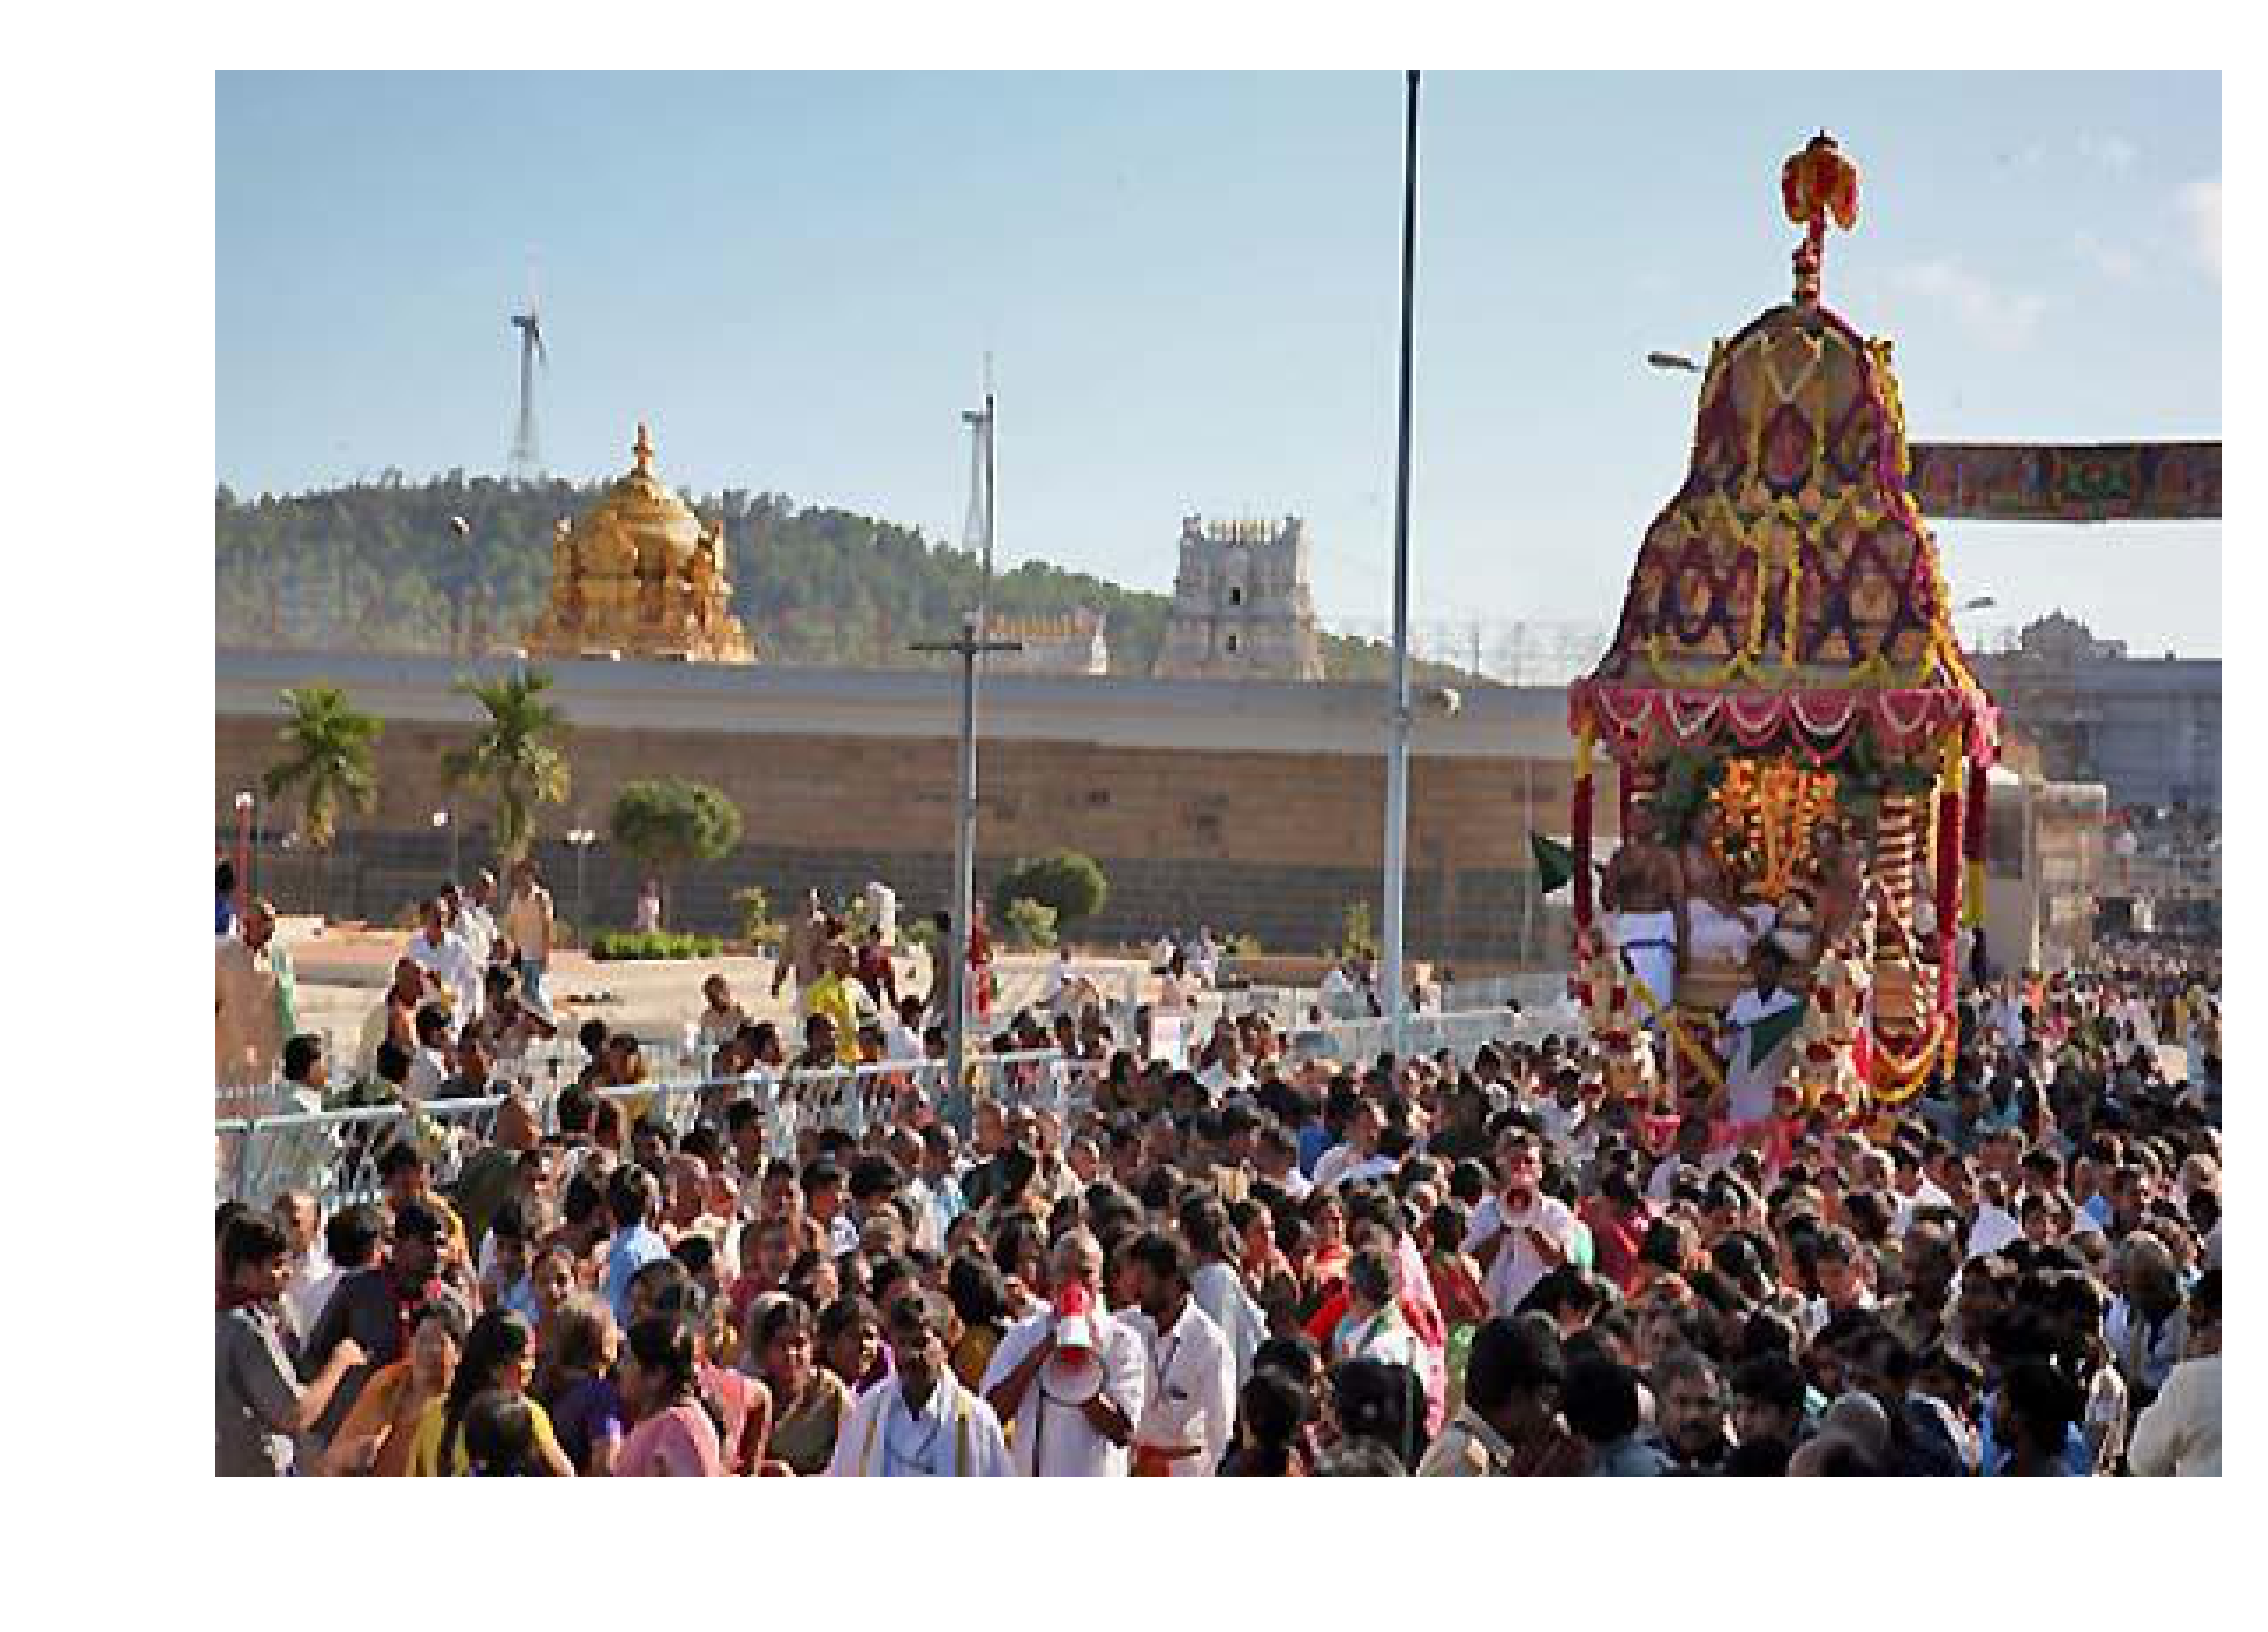

In [9]:
show_img(image, "img20.png")

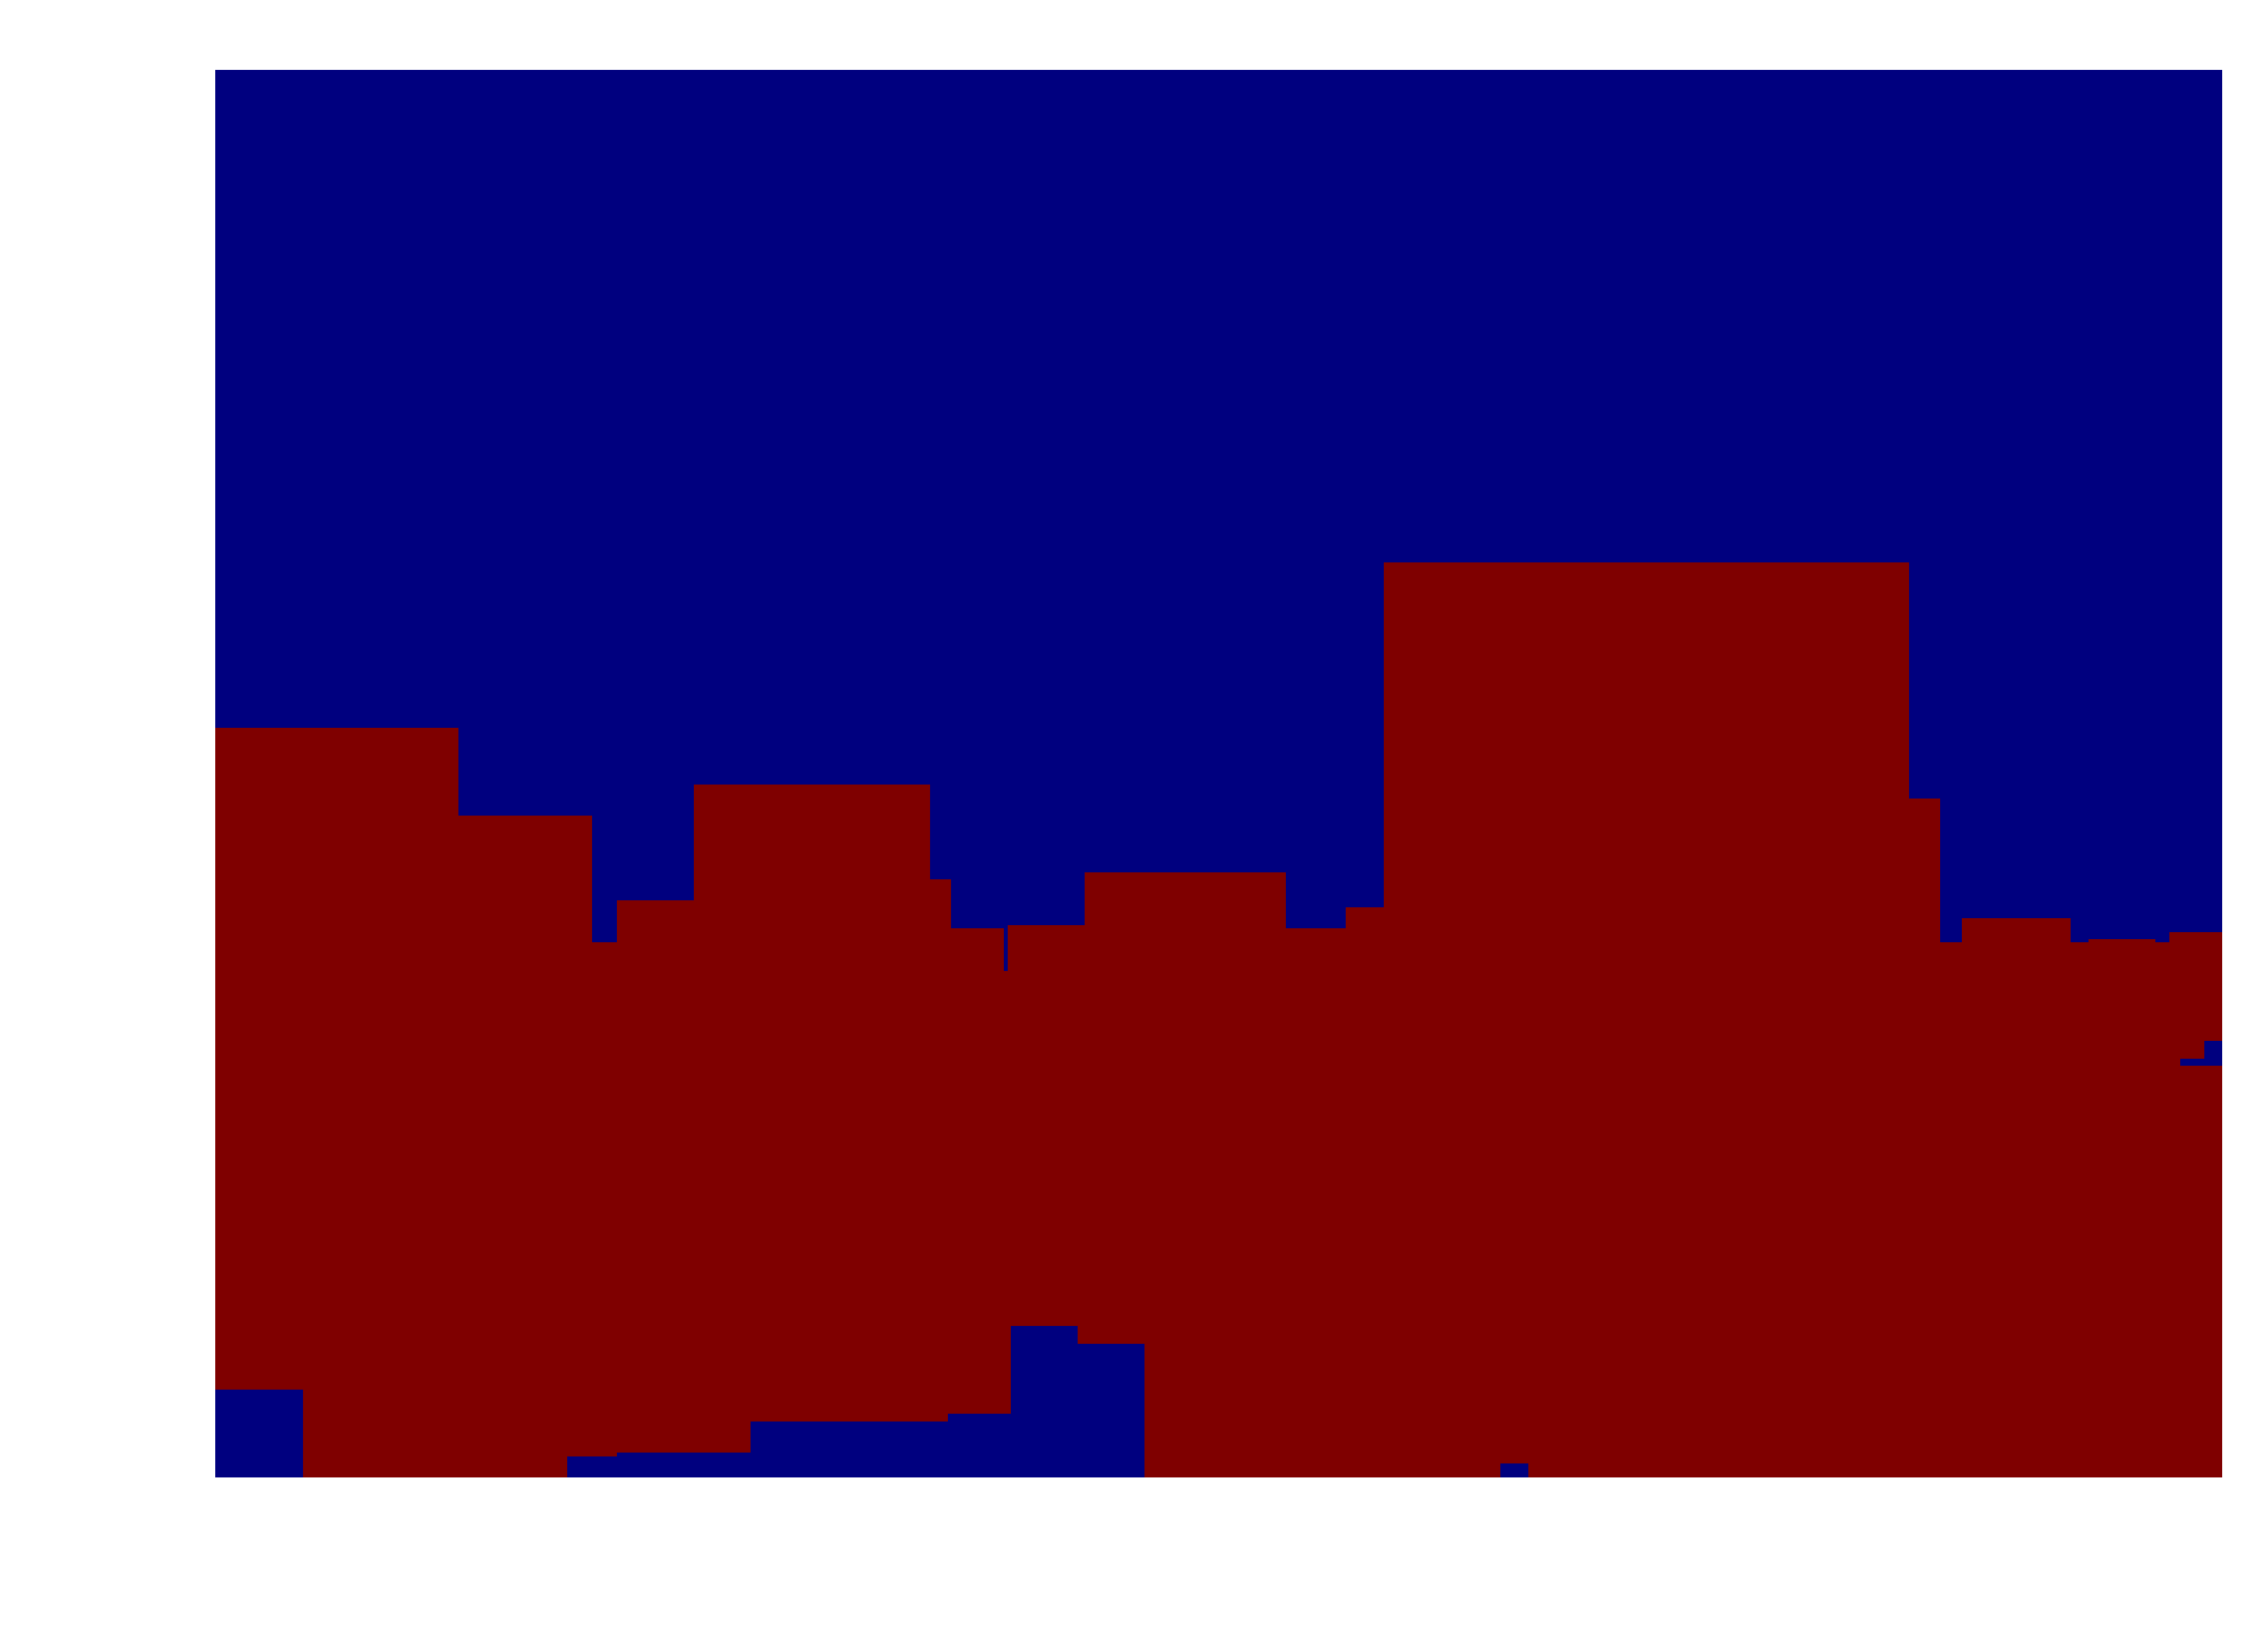

In [10]:
show_mask(mask, "mask20.png")

In [11]:
image.shape

(400, 570, 3)

In [12]:
mask.shape

(400, 570)

In [13]:
annotated_img = annotate_mask(image, mask)

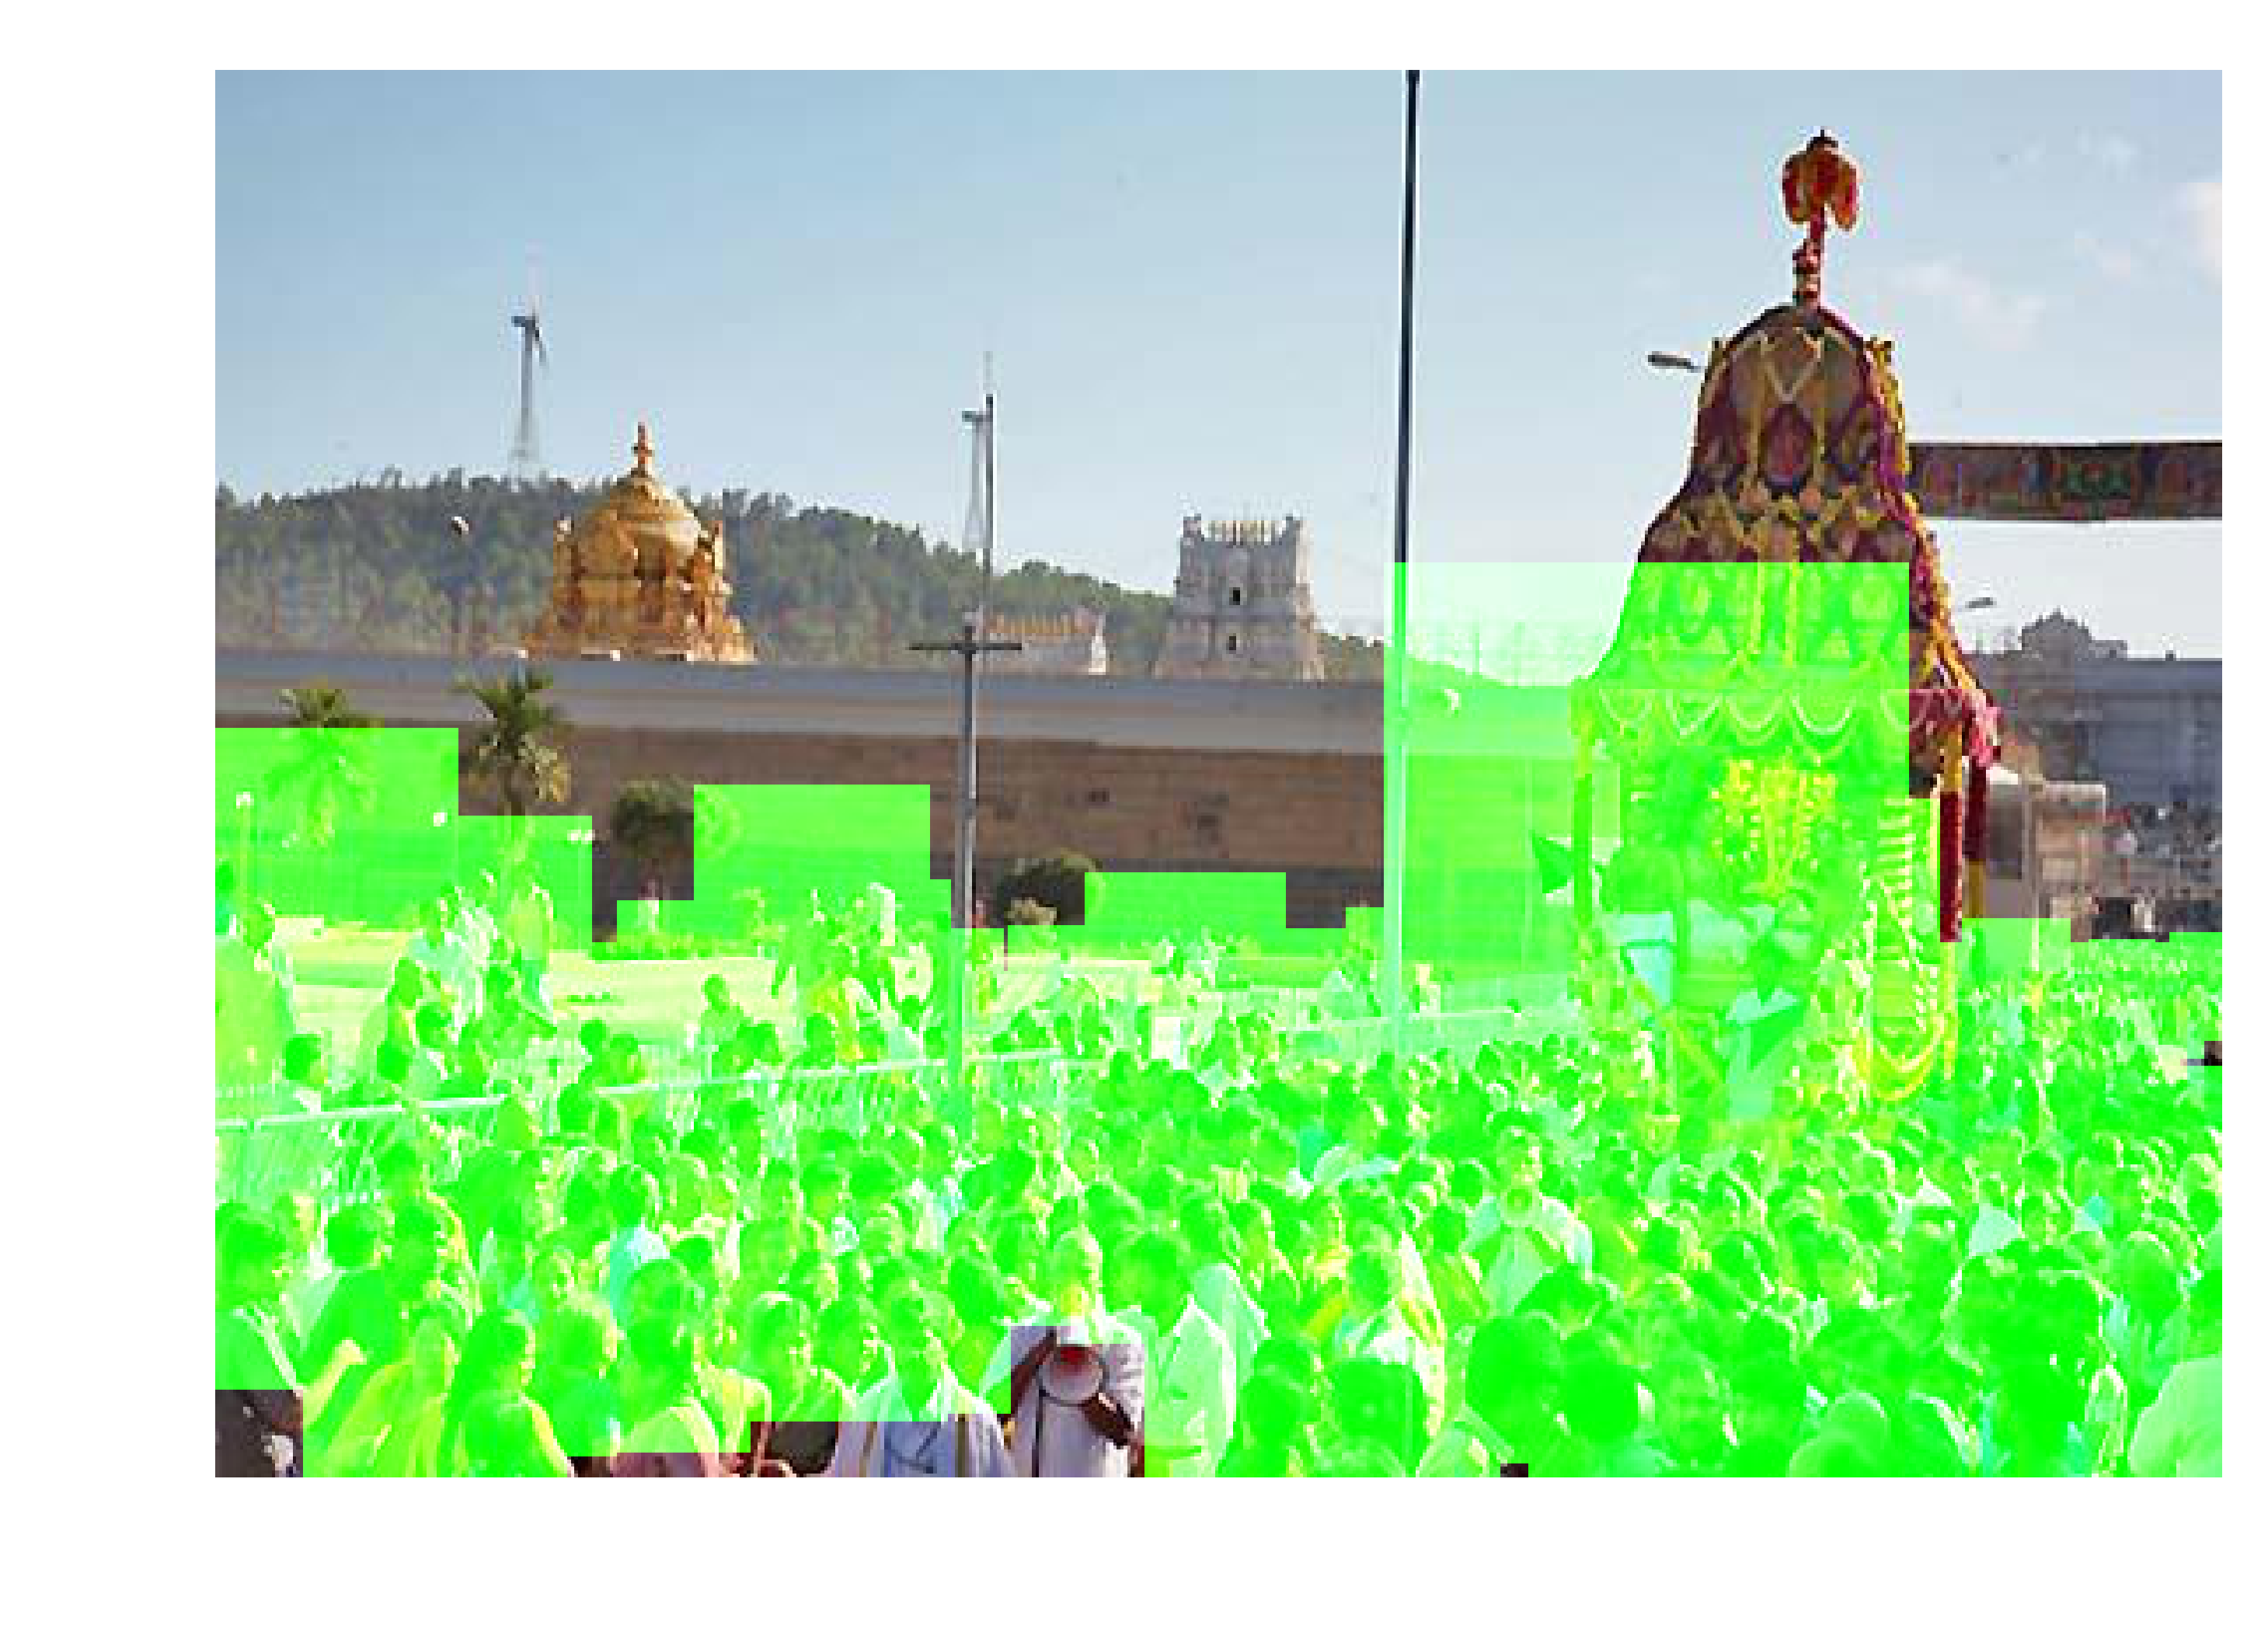

In [14]:
show_img(annotated_img, "annotated.png")